In [1]:
from IPython.display import clear_output

!wget -O event_log.csv https://www.dropbox.com/scl/fi/erhzkkdem2sher4rsdr2p/Event-Log-SCM.csv?rlkey=lo9fgt4a2fkezmxsfwtw8s0im&dl=1

clear_output()
print("Log loaded.")

Log loaded.


In [2]:
!pip install mpvis
!pip install pm4py

clear_output()
print("Packages installed.")

Packages installed.


In [3]:
import mpvis
from mpvis import mddrt
from mpvis import mpdfg
import pm4py
import pandas as pd
from datetime import datetime
from IPython.display import SVG, display
clear_output()

In [4]:
event_log = pd.read_csv('event_log.csv', sep = ';')

log_format = {'case:concept:name': 'ID_Case',
              'concept:name': 'Activity',
              'time:timestamp': 'TimeStamp',
              'start_timestamp': '',
              'org:resource': '',
              'cost:total': ''}

event_log = mpvis.log_formatter(event_log.copy(), log_format, timestamp_format = '%d-%m-%Y %H:%M')

In [5]:
print("Case count: " + str(len(set(event_log['case:concept:name']))))
print("Variant count: " + str(len(pm4py.stats.get_variants(event_log.copy()))))
print("Event count: " + str(len(event_log['case:concept:name'])))
print("Activity count: " + str(len(set(event_log['concept:name']))))

Case count: 99
Variant count: 4
Event count: 972
Activity count: 10


In [6]:
mpdfg_discovery_start = datetime.now()

dfg, start_activities, end_activities = mpdfg.discover_multi_perspective_dfg(event_log.copy())

mpdfg_discovery_end = datetime.now()

print("MP-DFG discovery time: " + str((mpdfg_discovery_end - mpdfg_discovery_start).total_seconds()) + " seconds.")

MP-DFG discovery time: 0.232695 seconds.


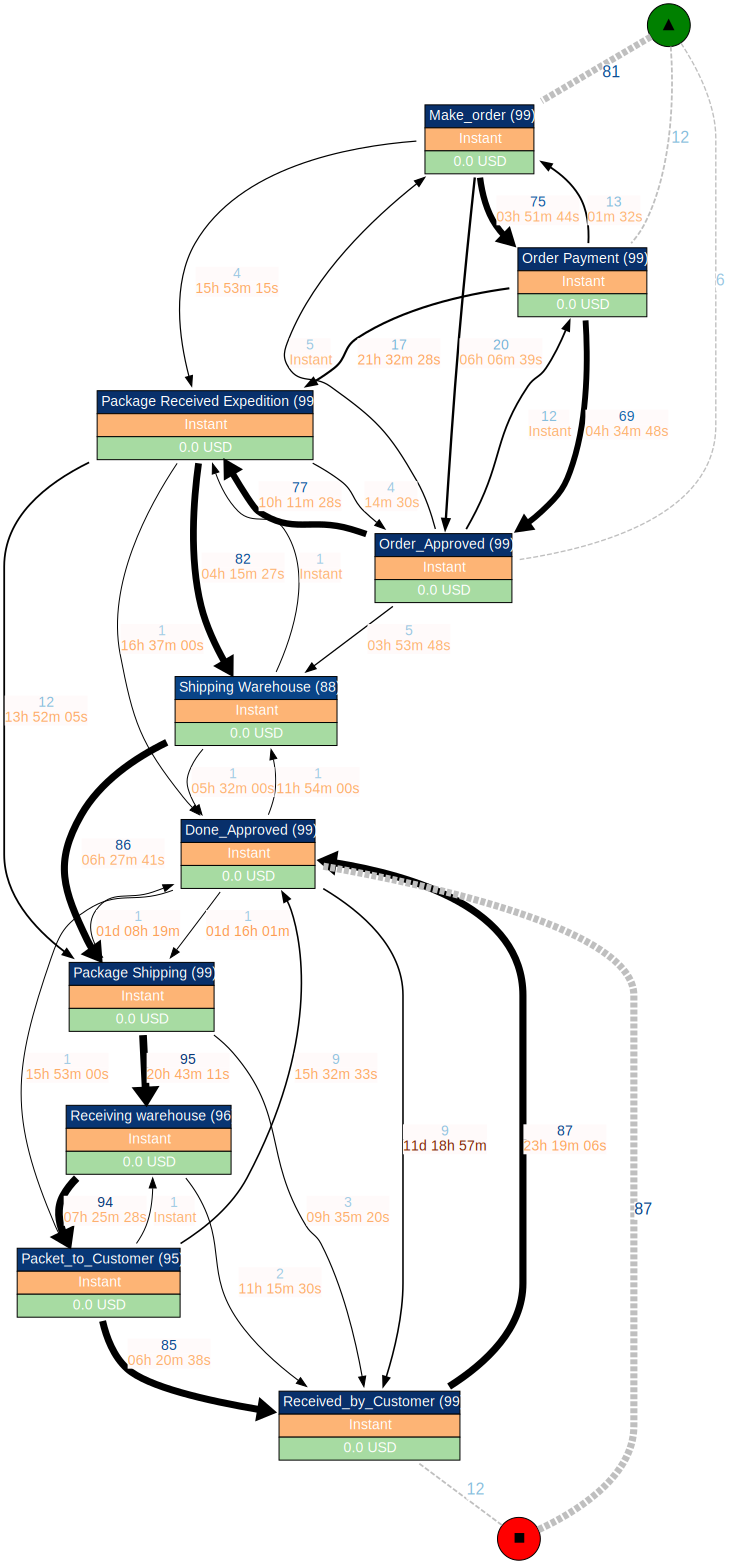

MP-DFG visualization time: 0.311106 seconds.


In [7]:
mpdfg_visualization_start = datetime.now()

mpdfg.view_multi_perspective_dfg(dfg, start_activities, end_activities)

mpdfg_visualization_end = datetime.now()

print("MP-DFG visualization time: " + str((mpdfg_visualization_end - mpdfg_visualization_start).total_seconds()) + " seconds.")

In [8]:
mddrt_discovery_start = datetime.now()

drt = mddrt.discover_multi_dimensional_drt(event_log.copy())

mddrt_discovery_end = datetime.now()

print("MD-DRT discovery time: " + str((mddrt_discovery_end - mddrt_discovery_start).total_seconds()) + " seconds.")

Calculating log mandatory activities: 


100%|██████████| 99/99 [00:00<00:00, 873.60it/s]


Calculating log metrics: 


100%|██████████| 99/99 [00:00<00:00, 682.20it/s]


Building Tree Cases:


100%|██████████| 99/99 [00:00<00:00, 138.18it/s]


Building Tree Graph:


100%|██████████| 99/99 [00:00<00:00, 2712.40it/s]

MD-DRT discovery time: 1.083194 seconds.


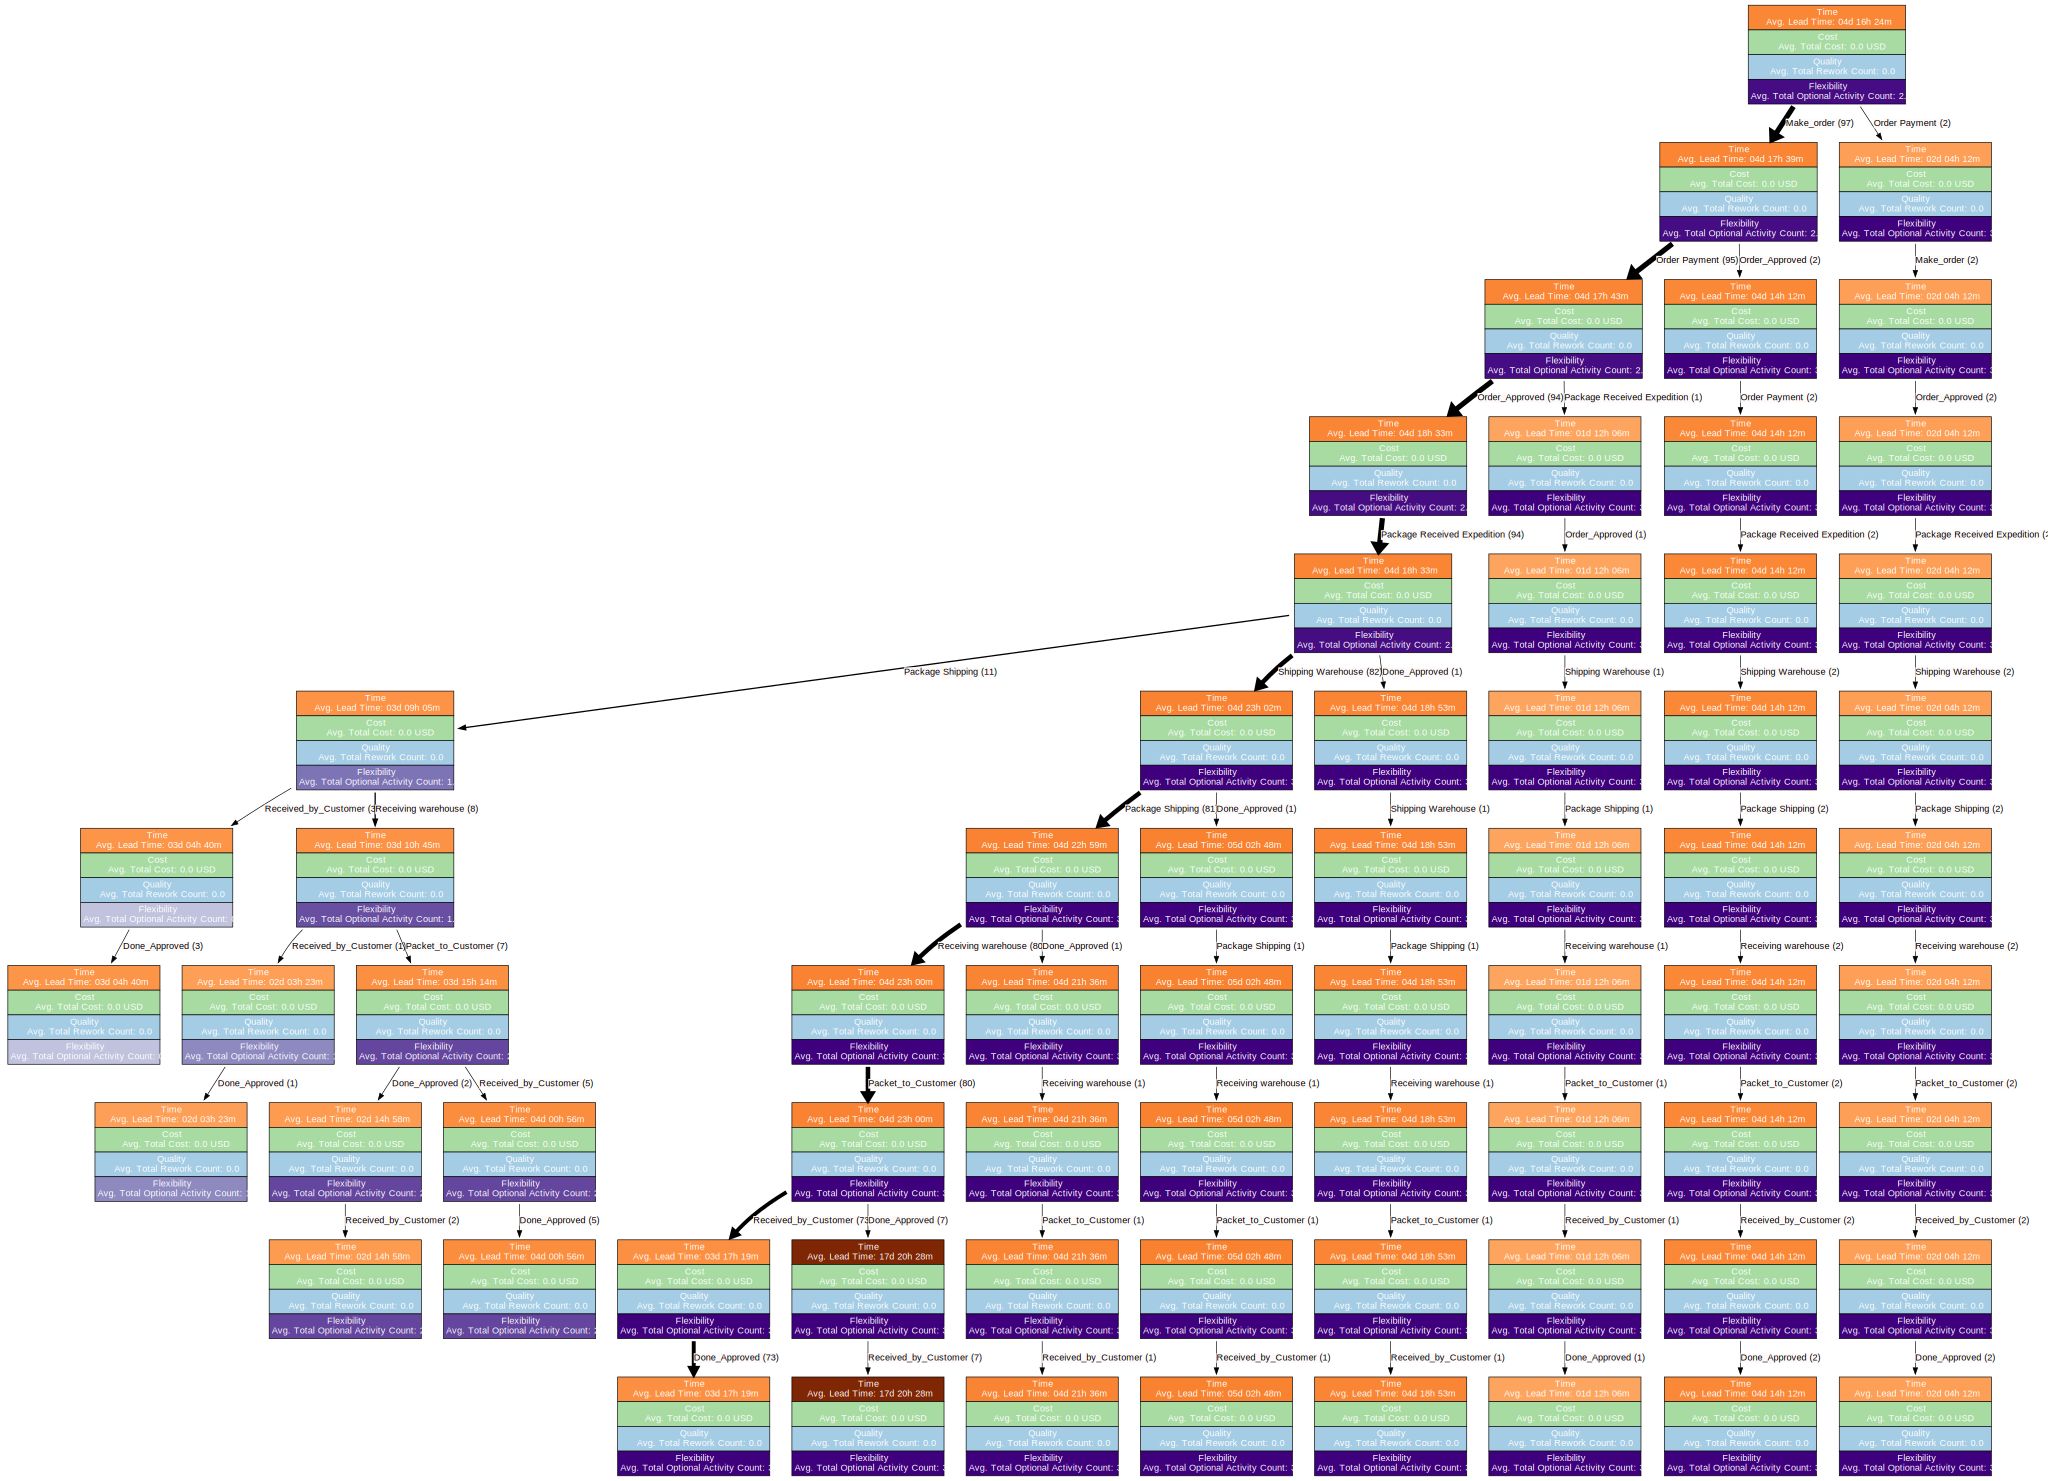

MD-DRT visualization time: 0.36375 seconds.


In [9]:
mddrt_visualization_start = datetime.now()

mddrt.view_multi_dimensional_drt(drt)

mddrt_visualization_end = datetime.now()

print("MD-DRT visualization time: " + str((mddrt_visualization_end - mddrt_visualization_start).total_seconds()) + " seconds.")

In [10]:
print("MP-DFG discovery time: " + str((mpdfg_discovery_end - mpdfg_discovery_start).total_seconds()) + " seconds.")
print("MP-DFG visualization time: " + str((mpdfg_visualization_end - mpdfg_visualization_start).total_seconds()) + " seconds.")
print("MD-DRT discovery time: " + str((mddrt_discovery_end - mddrt_discovery_start).total_seconds()) + " seconds.")
print("MD-DRT visualization time: " + str((mddrt_visualization_end - mddrt_visualization_start).total_seconds()) + " seconds.")

MP-DFG discovery time: 0.232695 seconds.
MP-DFG visualization time: 0.311106 seconds.
MD-DRT discovery time: 1.083194 seconds.
MD-DRT visualization time: 0.36375 seconds.


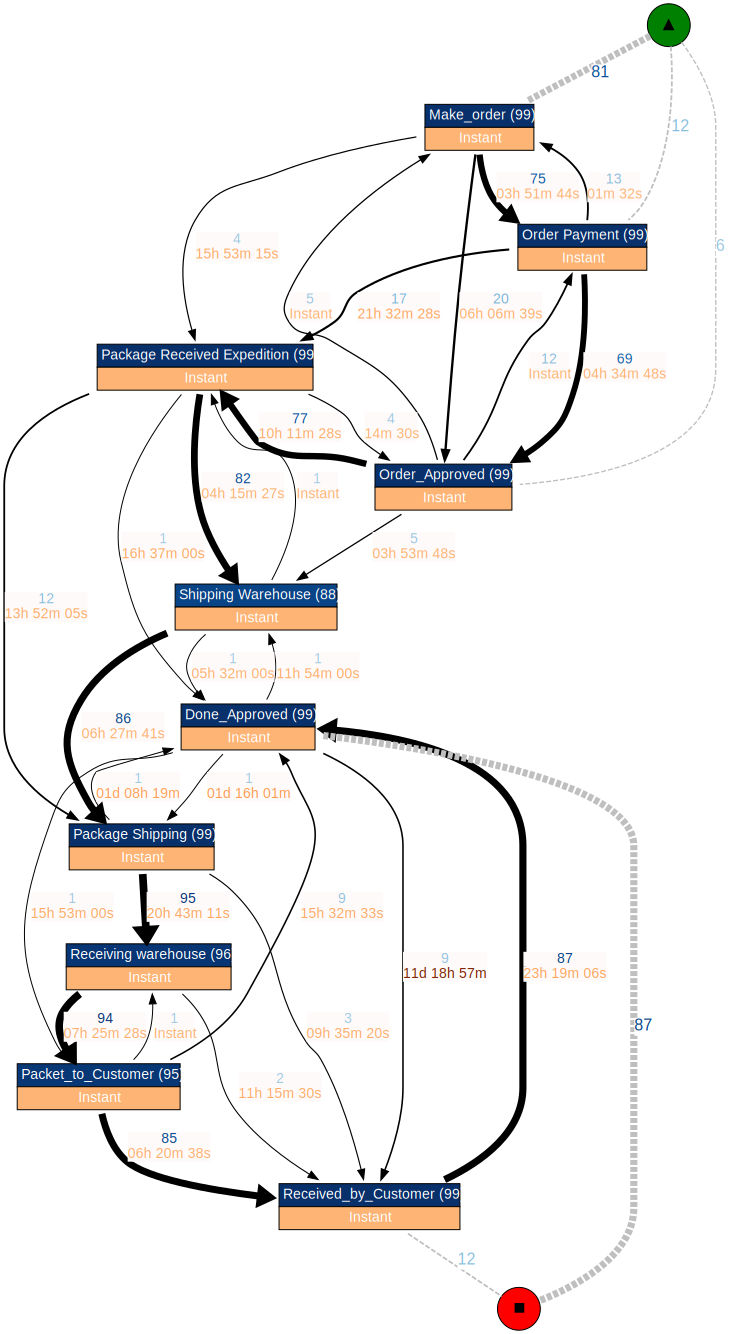

In [11]:
# Due to the small size of this event log, no processing is required to visualize simple process models
# Since the event log has no cost information, the process models are generated again without visualizing the cost dimension
mpdfg.save_vis_multi_perspective_dfg(dfg, start_activities, end_activities, file_name = 'dfg_event_log_100_100', format = 'svg', visualize_cost = False)
display(SVG(filename = 'dfg_event_log_100_100.svg'))

Calculating log mandatory activities: 


100%|██████████| 99/99 [00:00<00:00, 339.58it/s]


Calculating log metrics: 


100%|██████████| 99/99 [00:00<00:00, 170.49it/s]


Building Tree Cases:


100%|██████████| 99/99 [00:02<00:00, 44.98it/s]


Building Tree Graph:


100%|██████████| 99/99 [00:00<00:00, 599.25it/s]


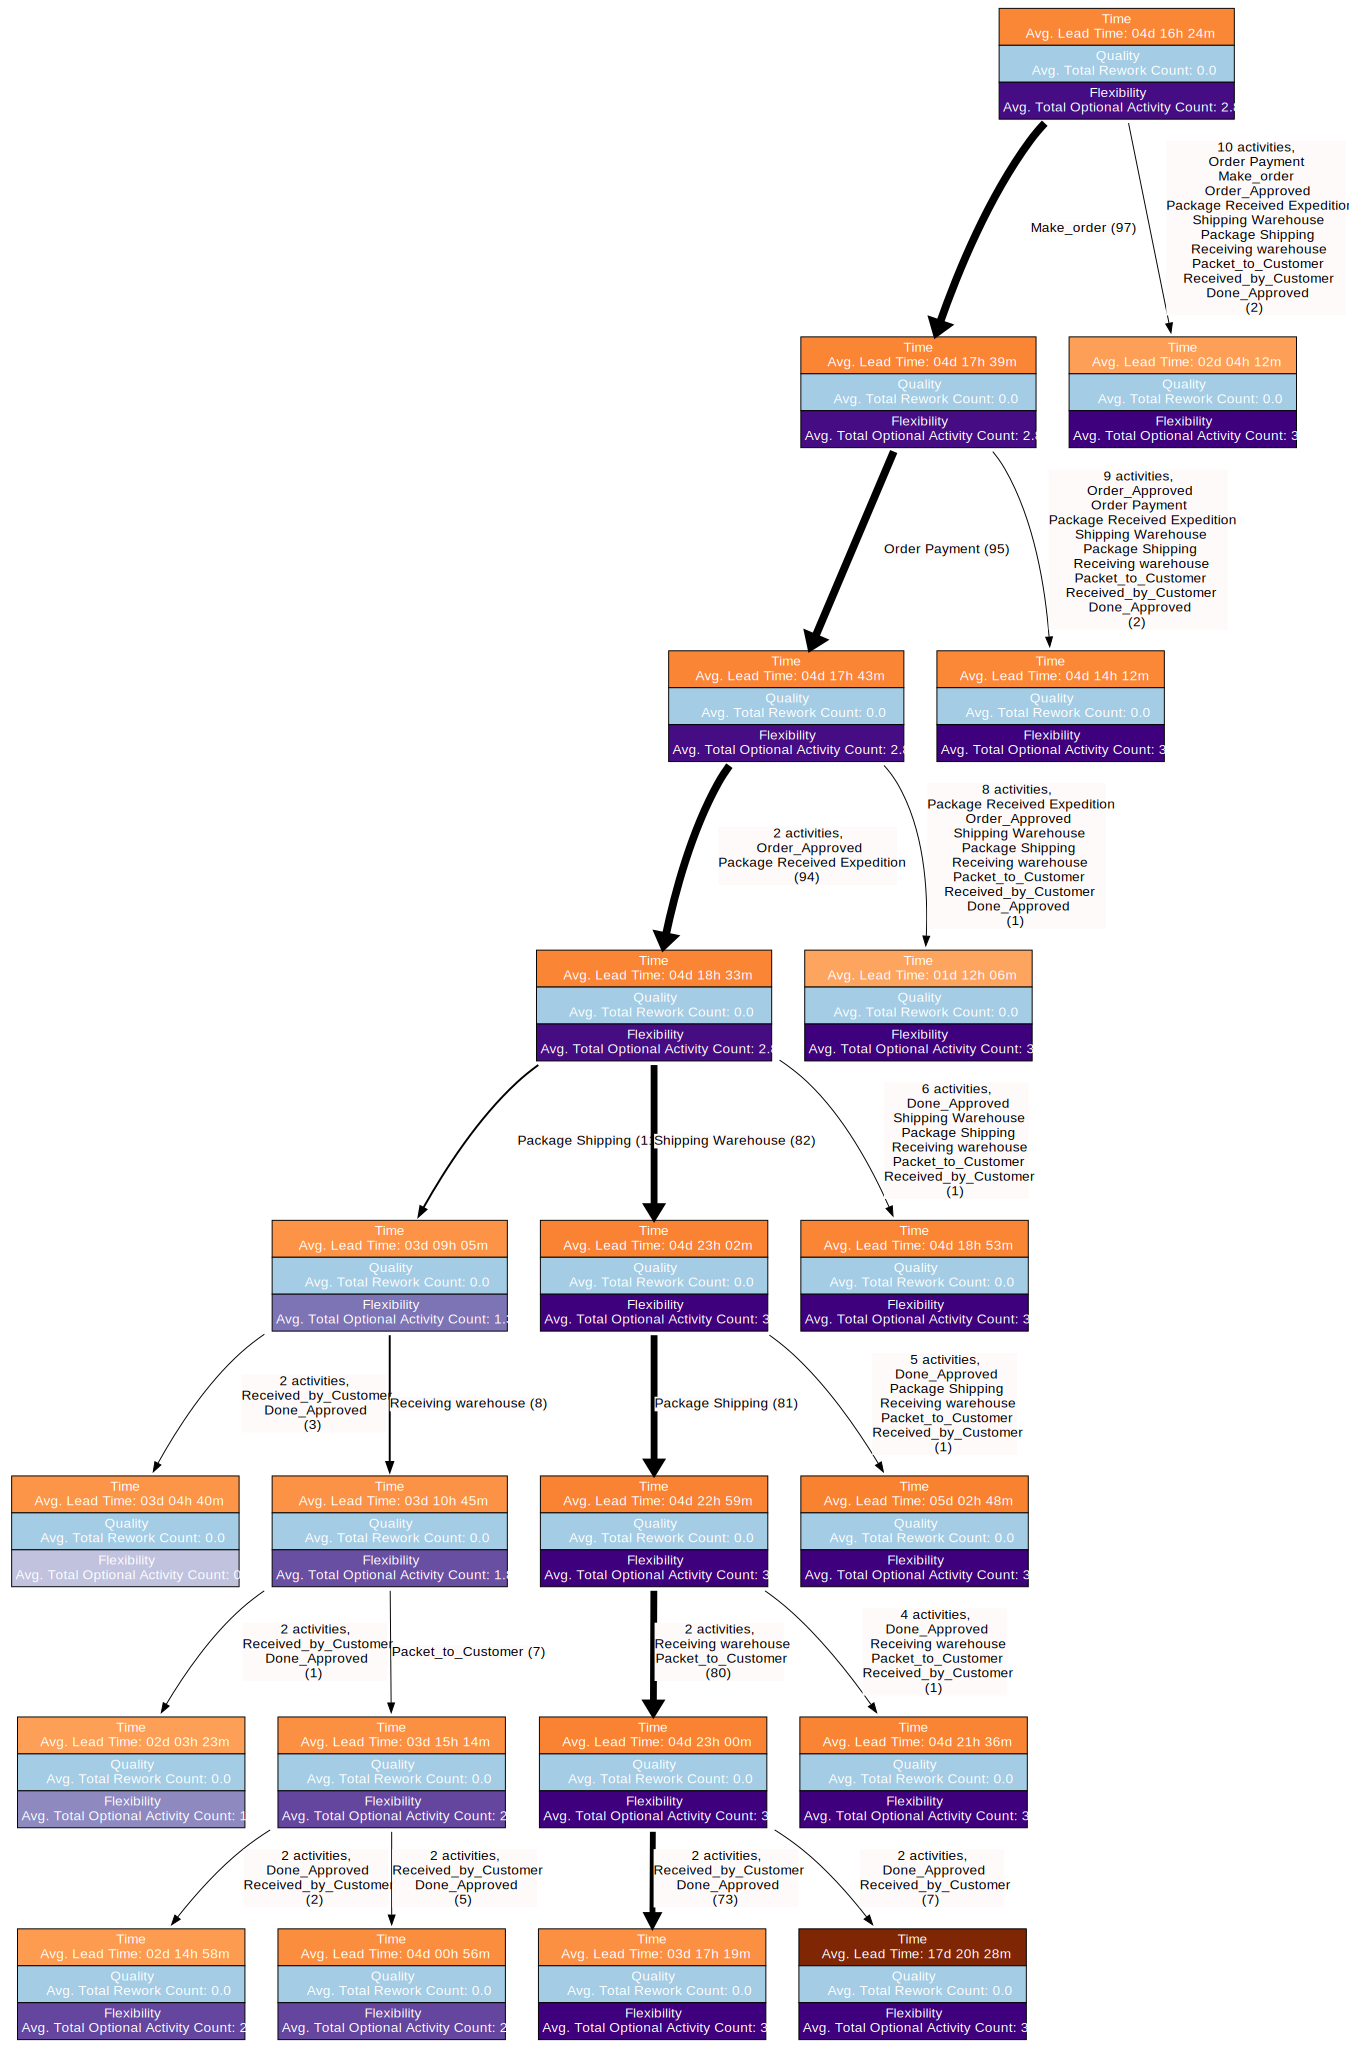

In [12]:
# By activating the 'group_activities' flag, linear paths are grouped
drt = mddrt.discover_multi_dimensional_drt(event_log.copy(), group_activities = True, show_names = True)
mddrt.save_vis_multi_dimensional_drt(drt, file_path = 'drt_event_log_autogroup', visualize_cost = False)
display(SVG(filename = 'drt_event_log_autogroup.svg'))